In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# Data Preparation

In [3]:
heartAtk = pd.read_csv("./heart_attack_prediction_dataset.csv")
heartAtk.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [4]:
heartAtk.shape

(8763, 26)

In [5]:
heartAtk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
heartAtk.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
# Removal of irrelevant variables for the objective in question.

columns_to_drop=['Patient ID','Hemisphere','Continent']
heartAtk_clean_version1 = heartAtk.drop(columns_to_drop,axis=1)

In [8]:
heartAtk_clean_version1.shape

(8763, 23)

In [9]:
heartAtk_clean_version1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


Nenhum valor nulo detetado.


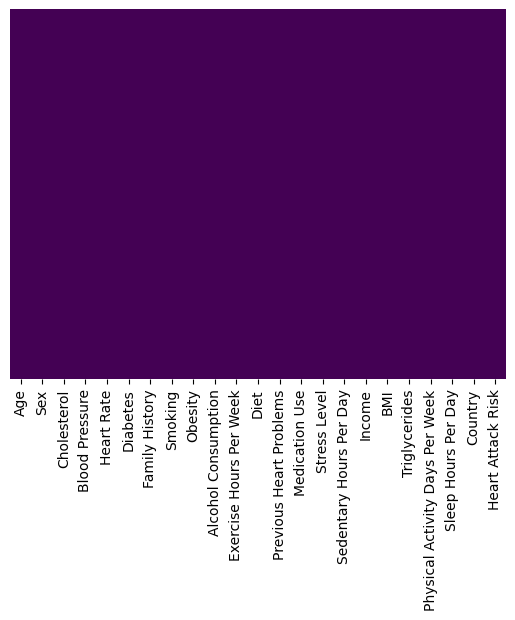

In [10]:
# Elimination of null values in the dataset.

heartAtk_clean_version1.isna().any()
sns.heatmap(heartAtk_clean_version1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("Nenhum valor nulo detetado.")

In [11]:
# Elimination of duplicate values in the dataset.

heartAtk_clean_version1.duplicated().sum()
heartAtk_clean_version1.drop_duplicates(inplace=True)
heartAtk_clean_version1.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


In [12]:
# Separation of Blood Pressure into Systolic Pressure and Diastolic Pressure.

def string_int_systolic(string):
    parts = string.split('/')
    return int(parts[0])

def string_int_diastolic(string):
    parts = string.split('/')
    return int(parts[1])


heartAtk_clean_version2 = pd.DataFrame(heartAtk_clean_version1)
heartAtk_clean_version2['Systolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_systolic)
heartAtk_clean_version2['Diastolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_diastolic)


***Blood Pressure Values by category***

Follows the specific format: Category/Systolic Pressure/Diastolic Pressure:

**Normal** : less than 120 and less than 80

**Elevated** : 120-129 and less than 80

**High Blood Pressure (Hypertension) Stage 1** : 130-139 or 80-89

**High Blood Pressure (Hypertension) Stage 2** : 140 or higher or 90 or higher

**Hypertensive Crisis :** higher than 180 and/or higher than 120

**Relevant age groups:** 18-39 ; 40-59; 60+

In [13]:
labels = ['18-39', '40-59', '60+']
bins = [18, 39, 59, 110]

# Create 'Age Group' column
heartAtk_clean_version2['Age Group'] = pd.cut(heartAtk_clean_version2['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Sex'
grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'])

# Get specific groups (e.g., males and females in the 18-39 age group)
age_group_1839_men = grouped.get_group(('18-39', 'Male'))
age_group_1839_women = grouped.get_group(('18-39', 'Female'))

# Similarly, you can retrieve other age groups and sex-specific groups
age_group_4059_men = grouped.get_group(('40-59', 'Male'))
age_group_4059_women = grouped.get_group(('40-59', 'Female'))

age_group_60over_men = grouped.get_group(('60+', 'Male'))
age_group_60over_women = grouped.get_group(('60+', 'Female'))

age_group_1839_men.head()

/tmp/ipykernel_3879/964467711.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'])


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
1,21,Male,389,165/93,98,1,1,1,1,1,...,285768,27.194973,235,1,7,Canada,0,165,93,18-39
8,20,Male,145,144/105,68,1,0,1,1,0,...,25086,35.809901,790,7,4,Brazil,0,144,105,18-39
17,38,Male,166,120/74,56,1,0,1,1,0,...,48376,29.517388,402,0,6,Thailand,0,120,74,18-39
24,36,Male,133,161/90,97,1,0,1,1,1,...,223132,22.386804,605,5,10,Canada,0,161,90,18-39
31,25,Male,197,178/72,45,0,1,1,0,1,...,59634,18.522199,661,0,6,Spain,0,178,72,18-39


In [14]:
mean_age39_systolic_men = age_group_1839_men['Systolic Pressure'].mean()
mean_age39_diastolic_men = age_group_1839_men['Diastolic Pressure'].mean()

mean_age39_systolic_women = age_group_1839_women['Systolic Pressure'].mean()
mean_age39_diastolic_women = age_group_1839_women['Diastolic Pressure'].mean()

mean_age59_systolic_men = age_group_4059_men['Systolic Pressure'].mean()
mean_age59_diastolic_men = age_group_4059_men['Diastolic Pressure'].mean()

mean_age59_systolic_women = age_group_4059_women['Systolic Pressure'].mean()
mean_age59_diastolic_women = age_group_4059_women['Diastolic Pressure'].mean()

mean_age60over_systolic_men = age_group_60over_men['Systolic Pressure'].mean()
mean_age60over_diastolic_men = age_group_60over_men['Diastolic Pressure'].mean()

mean_age60over_systolic_women = age_group_60over_women['Systolic Pressure'].mean()
mean_age60over_diastolic_women = age_group_60over_women['Diastolic Pressure'].mean()


print("Blood pressure means on men (age group 18-39) :\n Systolic %f Diastolic %f" %(mean_age39_systolic_men, mean_age39_diastolic_men) )
print("Blood pressure means on women (age group 18-39) :\n Systolic %f Diastolic %f\n" %(mean_age39_systolic_women, mean_age39_diastolic_women) )

print("Blood pressure means on men (age group 40-59) :\n Systolic %f Diastolic %f" %(mean_age59_systolic_men, mean_age59_diastolic_men) )
print("Blood pressure means on women (age group 40-59) :\n Systolic %f Diastolic %f\n" %(mean_age59_systolic_women, mean_age59_diastolic_women) )

print("Blood pressure means on men (age group 60+) :\n Systolic %f Diastolic %f" %(mean_age60over_systolic_men, mean_age60over_diastolic_men) )
print("Blood pressure means on women (age group 60+) :\n Systolic %f Diastolic %f\n" %(mean_age60over_systolic_women, mean_age60over_diastolic_women) )


Blood pressure means on men (age group 18-39) :
 Systolic 134.558413 Diastolic 84.931247
Blood pressure means on women (age group 18-39) :
 Systolic 135.510740 Diastolic 85.658711

Blood pressure means on men (age group 40-59) :
 Systolic 134.773538 Diastolic 85.468308
Blood pressure means on women (age group 40-59) :
 Systolic 135.515328 Diastolic 85.979562

Blood pressure means on men (age group 60+) :
 Systolic 135.363367 Diastolic 85.067853
Blood pressure means on women (age group 60+) :
 Systolic 135.053144 Diastolic 84.401240



In [15]:
heartAtk_clean_version2

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
0,67,Male,208,158/88,72,0,0,1,0,0,...,261404,31.251233,286,0,6,Argentina,0,158,88,60+
1,21,Male,389,165/93,98,1,1,1,1,1,...,285768,27.194973,235,1,7,Canada,0,165,93,18-39
2,21,Female,324,174/99,72,1,0,0,0,0,...,235282,28.176571,587,4,4,France,0,174,99,18-39
3,84,Male,383,163/100,73,1,1,1,0,1,...,125640,36.464704,378,3,4,Canada,0,163,100,60+
4,66,Male,318,91/88,93,1,1,1,1,0,...,160555,21.809144,231,1,5,Thailand,0,91,88,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,235420,19.655895,67,7,7,Thailand,0,94,76,60+
8759,28,Female,120,157/102,73,1,0,0,1,0,...,217881,23.993866,617,4,9,Canada,0,157,102,18-39
8760,47,Male,250,161/75,105,0,1,1,1,1,...,36998,35.406146,527,4,4,Brazil,1,161,75,40-59
8761,36,Male,178,119/67,60,1,0,1,0,0,...,209943,27.294020,114,2,8,Brazil,0,119,67,18-39


In [16]:
columns_to_drop2 = ["Age","Blood Pressure","Country"]
heartAtk_clean_finalVersion = heartAtk_clean_version2.drop(columns_to_drop2,axis=1)

In [17]:
heartAtk_clean_finalVersion

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
0,Male,208,72,0,0,1,0,0,4.168189,Average,...,6.615001,261404,31.251233,286,0,6,0,158,88,60+
1,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,...,4.963459,285768,27.194973,235,1,7,0,165,93,18-39
2,Female,324,72,1,0,0,0,0,2.078353,Healthy,...,9.463426,235282,28.176571,587,4,4,0,174,99,18-39
3,Male,383,73,1,1,1,0,1,9.828130,Average,...,7.648981,125640,36.464704,378,3,4,0,163,100,60+
4,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,...,1.514821,160555,21.809144,231,1,5,0,91,88,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,Male,121,61,1,1,1,0,1,7.917342,Healthy,...,10.806373,235420,19.655895,67,7,7,0,94,76,60+
8759,Female,120,73,1,0,0,1,0,16.558426,Healthy,...,3.833038,217881,23.993866,617,4,9,0,157,102,18-39
8760,Male,250,105,0,1,1,1,1,3.148438,Average,...,2.375214,36998,35.406146,527,4,4,1,161,75,40-59
8761,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,...,0.029104,209943,27.294020,114,2,8,0,119,67,18-39


In [18]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Sex                              8763 non-null   object  
 1   Cholesterol                      8763 non-null   int64   
 2   Heart Rate                       8763 non-null   int64   
 3   Diabetes                         8763 non-null   int64   
 4   Family History                   8763 non-null   int64   
 5   Smoking                          8763 non-null   int64   
 6   Obesity                          8763 non-null   int64   
 7   Alcohol Consumption              8763 non-null   int64   
 8   Exercise Hours Per Week          8763 non-null   float64 
 9   Diet                             8763 non-null   object  
 10  Previous Heart Problems          8763 non-null   int64   
 11  Medication Use                   8763 non-null   int64   
 12  Stress

We shall encode every categorical column (Diet, Sex and Age Group)

In [19]:
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Diet'], prefix='Diet')
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Sex'], prefix='Sex')
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Age Group'], prefix='AgeGroup')
heartAtk_clean_finalVersion['AgeGroup_18-39'] = heartAtk_clean_finalVersion['AgeGroup_18-39'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_40-59'] = heartAtk_clean_finalVersion['AgeGroup_40-59'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_60+'] = heartAtk_clean_finalVersion['AgeGroup_60+'].astype(int)
heartAtk_clean_finalVersion['Diet_Average']= heartAtk_clean_finalVersion['Diet_Average'].astype(int)
heartAtk_clean_finalVersion['Diet_Healthy']= heartAtk_clean_finalVersion['Diet_Healthy'].astype(int)
heartAtk_clean_finalVersion['Diet_Unhealthy']= heartAtk_clean_finalVersion['Diet_Unhealthy'].astype(int)
heartAtk_clean_finalVersion['Sex_Female']= heartAtk_clean_finalVersion['Sex_Female'].astype(int)
heartAtk_clean_finalVersion['Sex_Male']= heartAtk_clean_finalVersion['Sex_Male'].astype(int)
heartAtk_clean_finalVersion

,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,...,Systolic Pressure,Diastolic Pressure,Diet_Average,Diet_Healthy,Diet_Unhealthy,Sex_Female,Sex_Male,AgeGroup_18-39,AgeGroup_40-59,AgeGroup_60+
0,208,72,0,0,1,0,0,4.168189,0,0,...,158,88,1,0,0,0,1,0,0,1
1,389,98,1,1,1,1,1,1.813242,1,0,...,165,93,0,0,1,0,1,1,0,0
2,324,72,1,0,0,0,0,2.078353,1,1,...,174,99,0,1,0,1,0,1,0,0
3,383,73,1,1,1,0,1,9.828130,1,0,...,163,100,1,0,0,0,1,0,0,1
4,318,93,1,1,1,1,0,5.804299,1,0,...,91,88,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,121,61,1,1,1,0,1,7.917342,1,1,...,94,76,0,1,0,0,1,0,0,1
8759,120,73,1,0,0,1,0,16.558426,0,0,...,157,102,0,1,0,1,0,1,0,0
8760,250,105,0,1,1,1,1,3.148438,1,0,...,161,75,1,0,0,0,1,0,1,0
8761,178,60,1,0,1,0,0,3.789950,1,1,...,119,67,0,0,1,0,1,1,0,0


**Multivariate Analysis**

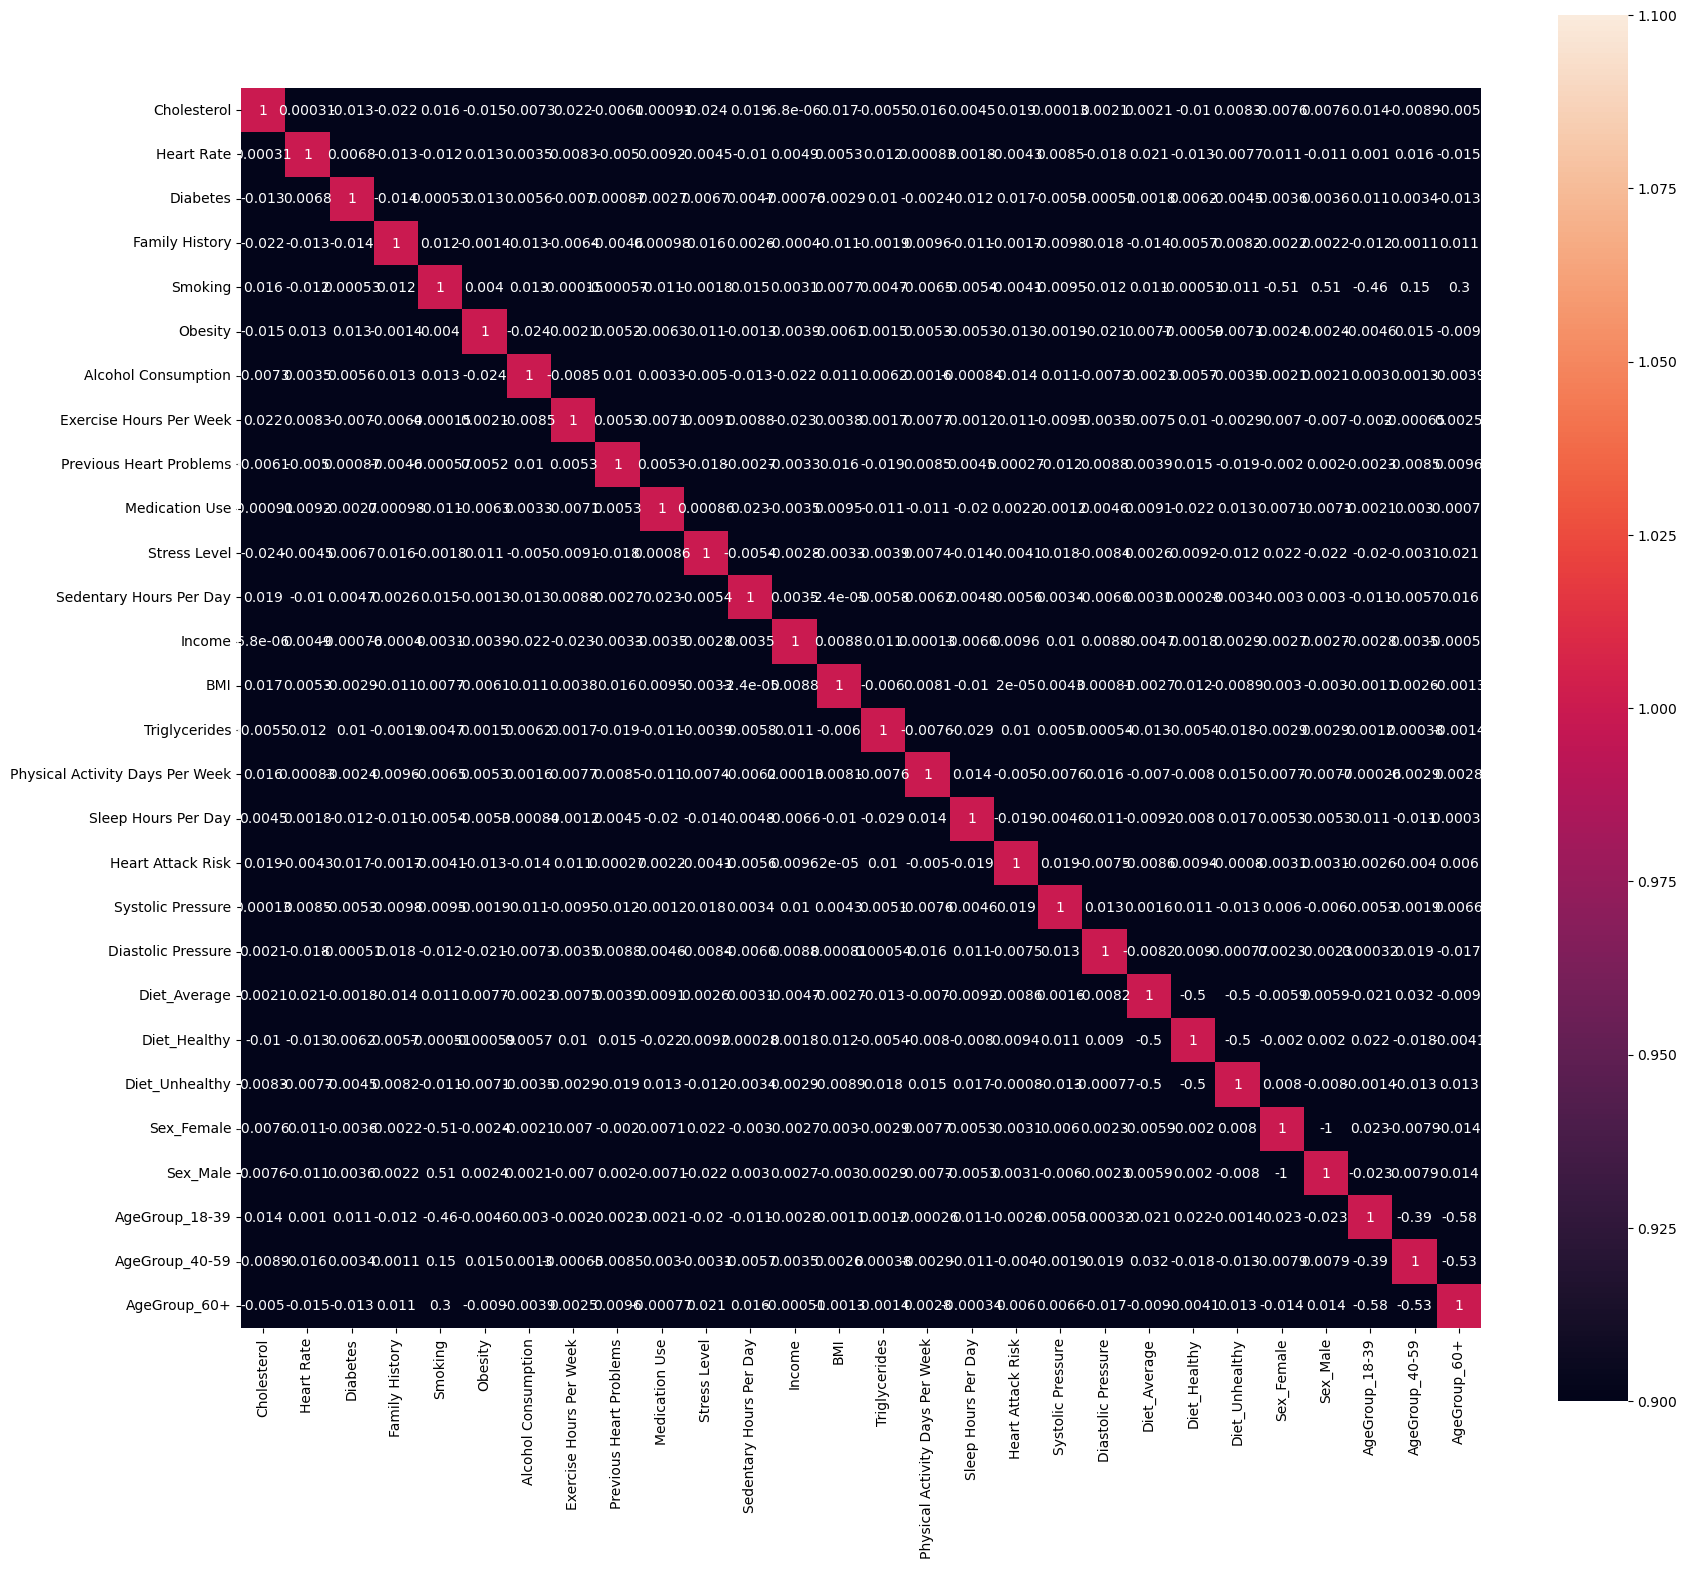

In [20]:
# Correlation between variables (This might need fixing due to the large dataset: Possible Solution, make it only for a subset of dataset)

plt.figure(figsize=(20,18))
correlation_matrix = heartAtk_clean_finalVersion.corr(numeric_only=True)
sns.heatmap(correlation_matrix, vmin = 1, vmax = 1, square= True, annot= True)
plt.show()

**Data pre-processing complete.** 

# Data Analysis

##### Decision Tree Classifier Method

In [21]:
x = heartAtk_clean_finalVersion.drop(['Heart Attack Risk'],axis=1) # Input Data
y = heartAtk_clean_finalVersion['Heart Attack Risk'].to_frame() # Target Feature

# Creating testing data and training data.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2021)

print("The shape of x is %s. The training set has the shape %s and the test set has the shape %s." %(x.shape, x_train.shape, x_test.shape))
print("The shape of y is %s. The training set has the shape %s and the test set has the shape %s." %(y.shape, y_train.shape, y_test.shape))

The shape of x is (8763, 27). The training set has the shape (5695, 27) and the test set has the shape (3068, 27).
The shape of y is (8763, 1). The training set has the shape (5695, 1) and the test set has the shape (3068, 1).


**Hold-Out Validation**

In [22]:
# Instance of the Decision Tree
classifier = DecisionTreeClassifier(random_state=2021)

# Begin training
classifier.fit(x_train, y_train)

# Predictions for the function
predictions = classifier.predict(x_test)

Found 1638 where the predictions were correct.
Found 1430 where the predictions were wrong.


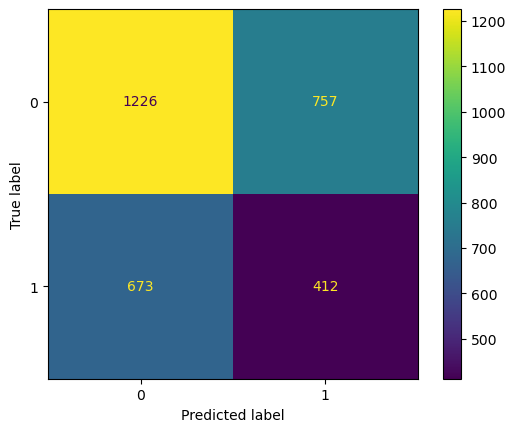

In [23]:
# And now for the Quality Metrics

# Confusion Matrix

print("Found 1638 where the predictions were correct.")
print("Found 1430 where the predictions were wrong.")
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [24]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score: %s" %accuracy)
precision = precision_score(y_test, predictions)
print("Precision Score: %s" %precision)
recall = recall_score(y_test, predictions)
print("Recall Score: %s" %recall)

Accuracy Score: 0.5338983050847458
Precision Score: 0.35243798118049613
Recall Score: 0.3797235023041475


ROC and AUC Score: 0.49898933562005154


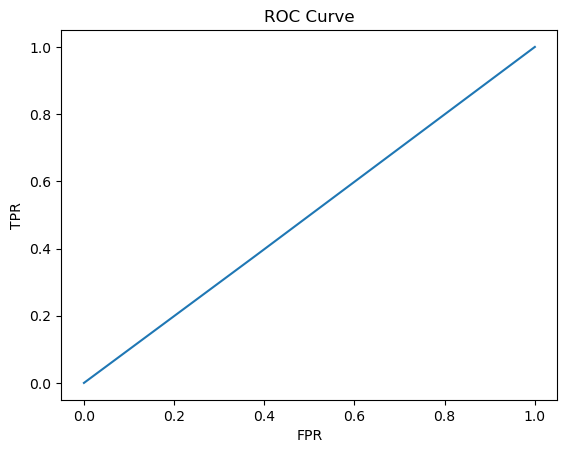

In [25]:
roc_auc = roc_auc_score(y_test,predictions)
print("ROC and AUC Score: %s" %roc_auc)

fpr, tpr, _ = roc_curve(y_test, predictions)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [26]:
f1 = f1_score(y_test, predictions)
fbeta = fbeta_score(y_test, predictions, beta=0.5)

print("F1 Score: %s" %f1)
print("FBeta Score: %s" %fbeta)

F1 Score: 0.3655723158828749
FBeta Score: 0.3575768095816699


**Cross Validation(k = 10)**

In [27]:
# And now for the Module Validation

classifier2 = DecisionTreeClassifier(criterion = "gini", max_depth=10, random_state=2021)
scores = cross_val_score(classifier2,x,y,cv = 10)
print(scores)
print("Accuracy of %0.2f with a standard deviation of %0.2f" %(scores.mean(), scores.std()))

[0.63397948 0.6031927  0.59293044 0.60045662 0.59931507 0.59817352
 0.62214612 0.62785388 0.64383562 0.63356164]
Accuracy of 0.62 with a standard deviation of 0.02


**Conclusions so far**

This method hasn't been the best because the amount of correctly predicted results is almost the same as the poorly predicted ones. We shall try a different method that is hopefully better suited to our dataset.

##### Logistic Regression Method